In [1]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Australian Text Analytics Platform (ATAP)
The Australian Text Analytics Platform aims to bring computational text analysis to the hands of students and researchers with little coding experience through easy to use widgets and library of functions on jupyter notebooks.

# Jux

Jux is the first tool designed with `Corpus` that we've introduced in the previous workshop.

> Jux helps compare and contrast two Corpus.

### 1. Create two Corpus and put them inside a Corpora

In [2]:
from juxtorpus.corpus import Corpus, Corpora
import pandas as pd

corpora = Corpora()
corpora.add(Corpus.from_dataframe(pd.read_csv('./notebooks/workshops/tweets_customer_support.csv'), 
                                  col_doc='text', name='support'))
corpora.add(Corpus.from_dataframe(pd.read_excel('./notebooks/workshops/amazon_us_reviews_gift_cards.xlsx'), 
                                  col_doc='review_body', name='gifts'))

In [3]:
corpora.items()

['support', 'gifts']

### 2. Create the Jux client with the two newly created Corpus

In [4]:
from juxtorpus import Jux

jux = Jux(corpora['support'], corpora['gifts'])

## Polarity Wordcloud

Polarity wordcloud is a quick way for you to visualise what kind of words or themes are stronger in one corpus as compared to the other.
There are 3 metrics:
1. tf - term frequency
2. [tfidf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) - term frequency inverse document frequency
3. [log likelihood](https://ucrel.lancs.ac.uk/llwizard.html)

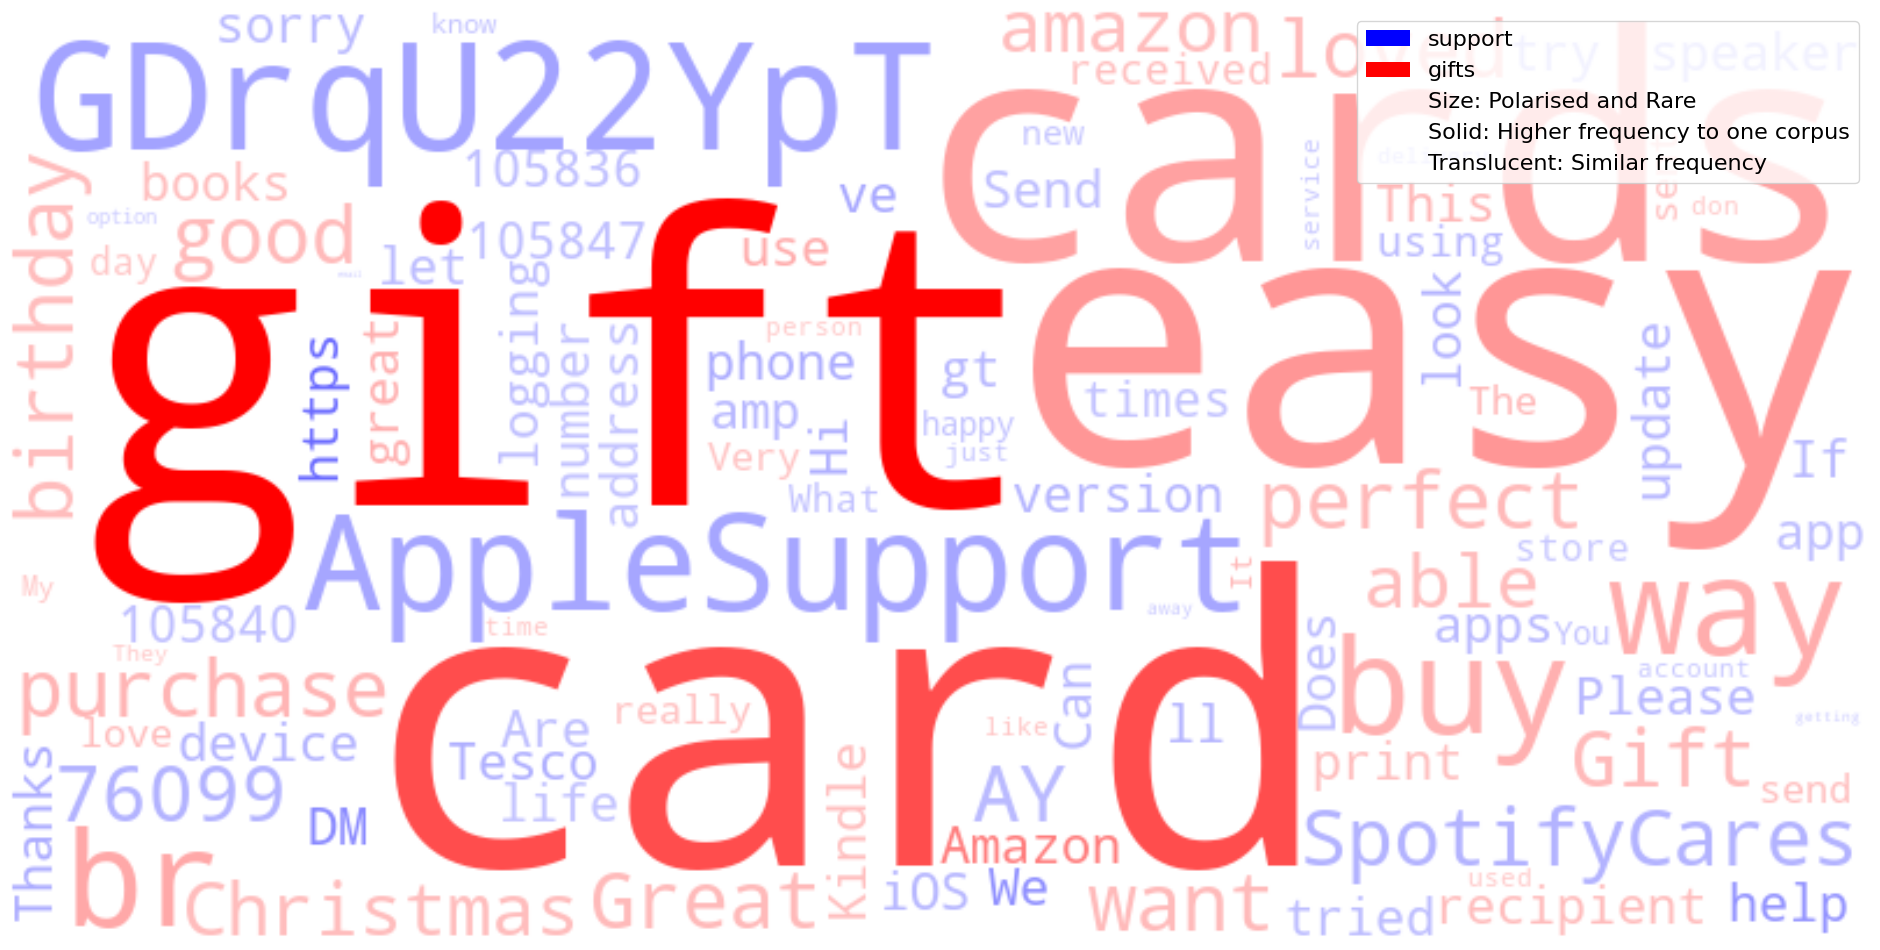

In [5]:
jux.polarity.wordcloud(metric='tf', top=100, lower=False)  # change this to 'tfidf' or 'log_likelihood'

#### 3a. View PolarityWordCloud calculations

In [6]:
tf = jux.polarity.tf()
tf

,freq_corpus_0,freq_corpus_1,polarity
031,0.001375,0.000000e+00,1.374570e-03
03331,0.000687,0.000000e+00,6.872852e-04
03am,0.000687,0.000000e+00,6.872852e-04
0m2mph15eh,0.000687,0.000000e+00,6.872852e-04
105676,0.000687,0.000000e+00,6.872852e-04
...,...,...,...
удобно,0.000000,3.627099e-07,-3.627099e-07
узнавать,0.000000,3.627099e-07,-3.627099e-07
услугами,0.000000,3.627099e-07,-3.627099e-07
что,0.000000,3.627099e-07,-3.627099e-07


In [7]:
# sort by the absolute value of polarity scores
tf['polarity_abs'] = tf.polarity.abs()
tf.sort_values('polarity_abs', ascending=False).iloc[:10]

,freq_corpus_0,freq_corpus_1,polarity,polarity_abs
gift,0.000000,0.042326,-0.042326,0.042326
card,0.000000,0.026048,-0.026048,0.026048
was,0.001375,0.021062,-0.019688,0.019688
https,0.019244,0.000003,0.019241,0.019241
you,0.030241,0.012221,0.018019,0.018019
amazon,0.000687,0.018591,-0.017903,0.017903
and,0.020619,0.038385,-0.017766,0.017766
help,0.013058,0.000440,0.012618,0.012618
your,0.015120,0.002858,0.012262,0.012262
easy,0.000000,0.012171,-0.012171,0.012171


In [8]:
# you can do the same for tfidf, loglikelihood;
tfidf, llv = jux.polarity.tfidf(), jux.polarity.log_likelihood()

### 3b. Create your own PolarityWordCloud

You can create your own `PolarityWordCloud` with a set of values you've defined.

It requires the following 2 series of values:
+ `col_polarity` - positive values representing one corpus, negative values representing the other corpus.
+ `col_size` - used to determine the size of the words

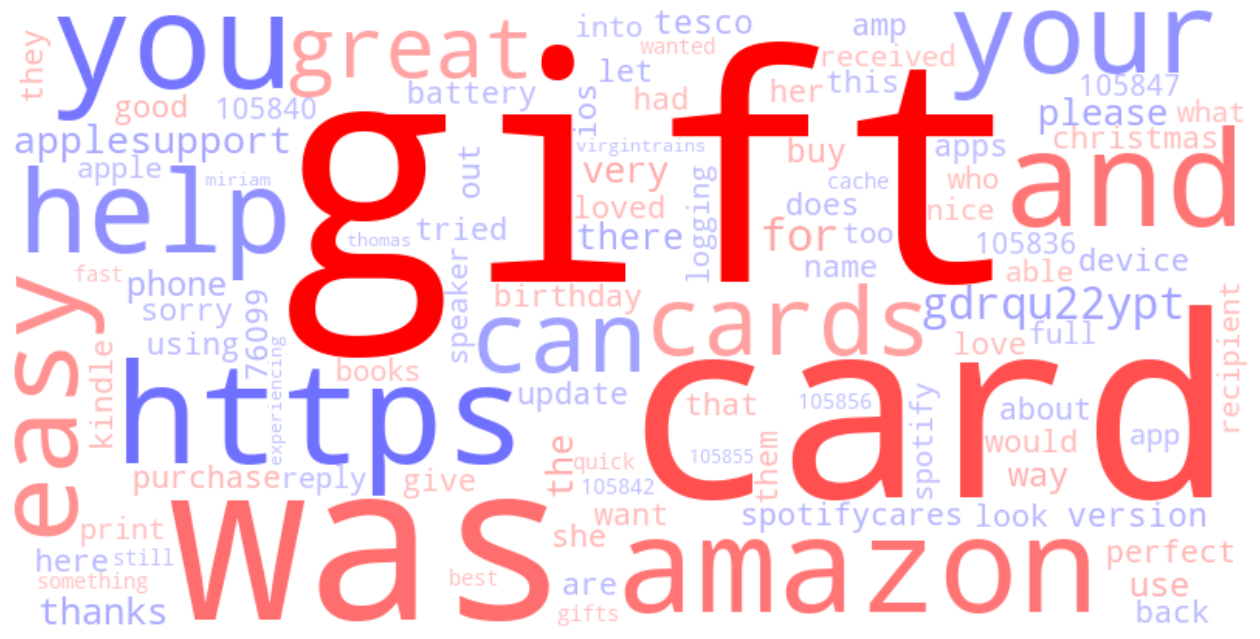

In [9]:
from juxtorpus.features.polarity import PolarityWordCloud

pwc = PolarityWordCloud(tf, col_polarity='polarity', col_size='polarity_abs')
pwc.gradate('blue', 'red')
pwc.top(100)
pwc.render(height=16, width=16)